# Some ins and outs of trial generation

## Control over proportions
Very frequently we want something to happen in an experiment with a certain probability across a range of trials. For example, we might want *congruent* and *incongruent* trials to occur equally often. Or we might want to have catch trials happen with a 10% probability. How do we do this?

### Leaving things to chance

An initial idea might be to use a `random.choice()` function. For example, in this case, we select *congruent* with a 50% probability:

In [25]:
import random
random.seed(6)
numTrials = 100
conditions=[]
for i in range(numTrials):
    conditions.append(random.choice(['congruent','incongruent']))

Let's check how frequent congruent is in conditions

In [26]:
print conditions.count('congruent')

49


Pretty close to 50! Not bad. But now let's look at the distributions of a hypothetical 40 subjects, each of whom is assigned congruent/incongruent trials in the manner above.

49.8 40 60


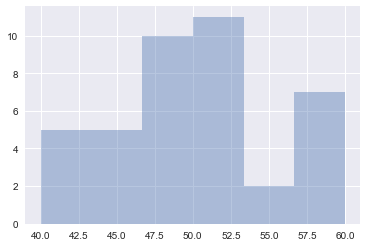

In [47]:
import seaborn as sns
import numpy as np

random.seed(6)
numSubj = 40
trialsPerSubject = 100
conditions=[]
for curSubj in range(numSubj):
    conditions.append([])
    for i in range(numTrials):
        conditions[curSubj].append(random.choice(['congruent','incongruent']))

frequencies = [thisSubj.count('congruent') for thisSubj in conditions]
sns.distplot(frequencies, kde=False); 
print np.mean(frequencies), min(frequencies), max(frequencies)

Ok, this isn't looking so good. The mean is close to 50, but some subjects are only getting 40% and others 60%. The situation gets worse when we have conditions that occur relatively rarely. Let's have a look at a trial sequence in which we would like to have 10% catch trials.

[12, 8, 6, 7, 6, 3, 8, 9, 15, 11, 9, 9, 11, 12, 14, 14, 10, 8, 5, 13, 7, 9, 12, 4, 6, 8, 11, 9, 17, 9, 9, 7, 10, 9, 12, 16, 12, 6, 6, 12]
9.525 3 17


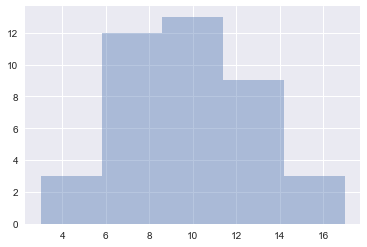

In [104]:
import seaborn as sns
import numpy as np

random.seed(8)
numSubj = 40
trialsPerSubject = 100
isCatchTrial=[]
for curSubj in range(numSubj):
    isCatchTrial.append([])
    for i in range(numTrials):
        isCatchTrial[curSubj].append(int(random.random() <= .1))

frequencies = [np.sum(thisSubj) for thisSubj in isCatchTrial]
print frequencies
sns.distplot(frequencies, kde=False); 
print np.mean(frequencies), min(frequencies), max(frequencies)

Instead of 10%, some subjects are seeing only 3%. Others 17%. This kind of variability can kill otherwise excellent experimental designs.

<div class="alert alert-block alert-info">
What's `random.random()<.1`? `random.random()` returns a float from 0 to 1.0 drawn from a uniform distribution. This means that random.random() can be expected to return a value < .1, 10% of the time.
</div>

If you're curious just how off-kilter things can get, consider an experiment in which instead of 100 trials, we have 40. With a certain condition happening a desired 10% of the time, when we leave things to chance, you have about a 1.4% of having a subject with *no* trials of this type at all and a ~2.7% of having these trials happen 20% instead of 10% of the time. The desired 10% will occur in only ~20% of the subjects.


In [106]:
import seaborn as sns
import numpy as np

numSubj = 40000
trialsPerSubject = 40
isCatchTrial=[]
for curSubj in range(numSubj):
    isCatchTrial.append([])
    for i in range(trialsPerSubject):
        isCatchTrial[curSubj].append(int(random.random() <= .1))

print np.mean([np.sum(thisSubj)==0 for thisSubj in isCatchTrial])
print np.mean([np.sum(thisSubj)==4 for thisSubj in isCatchTrial])
print np.mean([np.sum(thisSubj)==8 for thisSubj in isCatchTrial])

0.01505
0.20465
0.027325


### Exerting control over chance
The solution is to *not* leave things to chance, but specify precisely, the proportion you want. The easiest way of doing that is to create all your conditions, with prespecified proportions. Want 100 trials with a 50/50 split of congruent/incongruent? Easy!

In [80]:
numTrials=100
conditions = ['congruent','incongruent']*numTrials
conditions = conditions[0:numTrials]
conditions.count('congruent')

50

Then, to get a random order, simply `random.shuffle` it.

Want to get a 45/45/10 split between three conditions? Let's try it:

In [79]:
numTrials = 100
conditions = ['congruent']*int(numTrials*.45) + \
    ['incongruent']*int(numTrials*.45) + \
    ['catch']*int(numTrials*.1)
print conditions.count('congruent'), \ 
    conditions.count('incongruent'), \
    conditions.count('catch') 


45 45 10


 <div class="alert alert-block alert-info">
What's that '\' in the code-block above? It's a way to break up a long line for ease of reading. Python knows that lines that terminate with slashes should continue to the next line 
</div>

### What about when things don't divide evenly?

It's nice that .45*100 = 45 - an integer, but what if we only have 42 trials to work with and we need something to happen 10% of the time?

In [ ]:
Stay tuned

## Control over randomization
Stay tuned

## Control over combinatorial explostions
Stay tuned